<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Data Science and Business Analytics</font></center>
<center><font size=6>Ensemble Techniques and Model Tuning</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [2]:
# Installing the libraries with the specified version.
!pip install shap numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap
import math

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)

from sklearn import metrics
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    confusion_matrix,
)

from sklearn.metrics import (
    classification_report,
    roc_curve,roc_auc_score,
    f1_score,precision_score,
    recall_score,
    precision_recall_curve,
    average_precision_score,auc
)

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import calibration_curve

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

warnings.filterwarnings('ignore')

---

# **Loading the dataset**

In [4]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# Loading the Visa data
raw_visa_data = pd.read_csv('/content/drive/MyDrive/Python Course/EasyVisa.csv')

Mounted at /content/drive


---

# **Overview of the Dataset**

* Observations

* Sanity checks

#### First and Last 5 Rows

In [5]:
# Copying data into a new dataframe
visa_data = raw_visa_data.copy()

# First 5 rows
visa_data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
# Last 5 rows
visa_data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Shape of the data

In [7]:
visa_data.shape

(25480, 12)

#### Data types check

In [8]:
visa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Duplicate and Null Check

In [9]:
# Checking nulls
visa_data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [10]:
# Checking Duplicates
visa_data.duplicated().sum()

np.int64(0)

#### Missing Value

In [11]:
# Checking Missing Values
visa_data.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


---

# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**

What is the distribution of visa case statuses (certified vs. denied)?


1. What is the distribution of visa case statuses (certified vs. denied)?
2. How does the education level of employees impact visa approval rates?
3. Is there a significant difference in visa approval rates between employees with and without prior job experience?
4. How does the prevailing wage affect visa approval? Do higher wages lead to higher chances of approval?
5. Do certain regions in the US have higher visa approval rates compared to others?
6. How does the number of employees in a company influence visa approval? Do larger companies have a higher approval rate?
7. Are visa approval rates different across various continents of employees? Which continent has the highest and lowest approval rates?

#### Statistics of the overall data

In [12]:
visa_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-ve value for 'no_of_employees' looks out of place. Looking into it furthur

In [13]:
visa_data[visa_data['no_of_employees']<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


Looks like these are misinformation. We will proceed with an assumption that the -ve signs are mistakes and we should correct them as absolute values.

In [14]:
# Editing the -ve values into +ve values for 'no_of_employees'
visa_data['no_of_employees'] = abs(visa_data['no_of_employees'])

# Checking the statistics of numeric features again
visa_data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Checking unique values for each feature

In [15]:
# Checking the list of unique values for each feature
for col in visa_data.columns:
  print(f'{col} : {visa_data[col].unique()}')

case_id : ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']
continent : ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
education_of_employee : ['High School' "Master's" "Bachelor's" 'Doctorate']
has_job_experience : ['N' 'Y']
requires_job_training : ['N' 'Y']
no_of_employees : [14513  2412 44444 ... 24335 48785 40224]
yr_of_estab : [2007 2002 2008 1897 2005 2012 1994 1924 1995 2004 1963 2006 1987 1991
 2001 1972 2013 1968 1884 1981 1997 2009 1998 1880 2000 2010 1965 1909
 2011 1989 1933 1960 2003 1976 1996 1847 1935 1890 1999 1838 1947 1939
 1970 1977 1982 1943 1956 1864 1974 1985 1984 1971 1913 1969 1818 1839
 1914 1988 1944 1855 1975 1966 1801 1920 1925 1993 1992 1979 1986 1931
 1962 1954 1868 1859 1946 1950 1869 1917 2014 1980 1896 1949 1843 1850
 1906 1961 1951 1958 1912 1983 1948 1945 1978 1898 1923 1911 1851 1865
 1849 1872 1967 1926 1873 1848 2015 1889 1876 1852 1938 1973 1959 1927
 1990 1930 1922 1940 1878 1934 1834 1928 1800 1861 1952 1

In [16]:
# Checking the count of unique values for each feature
for col in visa_data.columns:
  print(f'{col} : {visa_data[col].nunique()}')

case_id : 25480
continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
no_of_employees : 7105
yr_of_estab : 199
region_of_employment : 5
prevailing_wage : 25454
unit_of_wage : 4
full_time_position : 2
case_status : 2


#### Dropping Case id as it is a unique row identifier, hence adds no value to the analysis

In [17]:
# Dropping 'case_id'
visa_data.drop('case_id', axis=1, inplace=True)

### Univariate Analysis

#### Converting all categorical features into proper types

In [18]:
# Loop to convert all non-numeric features as category
for col in visa_data.select_dtypes(exclude=['number']).columns:
  visa_data[col] = visa_data[col].astype('category')

# Checking the type of the features
visa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


Bars plots for Categorical features and histogram with box plots for numeric features

In [19]:
# Function for Plotting Bars for Categorical features and histogram with box
# plots for numeric features
def plot_feature(data, feature):
  if data[feature].dtypes == 'category':
    # Plot for categorical features
    plt.figure(figsize=(5, 1 + 0.5*data[feature].nunique()))
    plot = sns.countplot(
        y=feature,
        data=data,
        order=data[feature].value_counts().index,
        orient='h'
    )

    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    # Adding label to the plot bars
    for p in plot.patches:
      plot.annotate(
          f'{int(p.get_width())}',
          (p.get_width() + 0.1,
          p.get_y() + p.get_height() / 2.0),
          ha='left', va='center'
      )

    plt.title(f'Count Plot for {feature}')
    plt.show()

  else:
    # Plotting for numeric features, Histogram
    plt.figure(figsize=(18, 5))
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Histogram for {feature}')

    # Plotting for numeric features, Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=feature)
    plt.title(f'Box Plot for {feature}')
    plt.tight_layout()
    plt.show()

-> continent

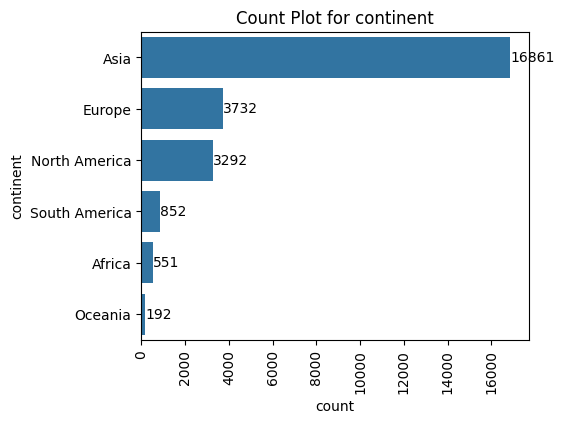

In [20]:
plot_feature(visa_data, 'continent')

-> education_of_employee

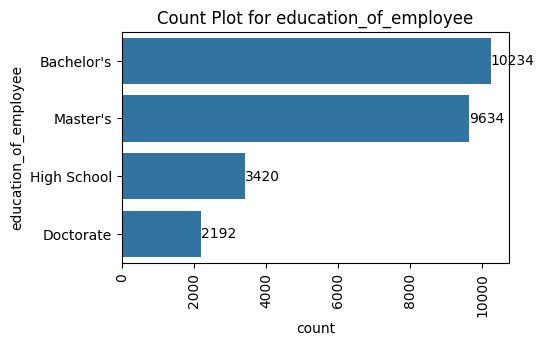

In [21]:
plot_feature(visa_data, 'education_of_employee')

-> has_job_experience

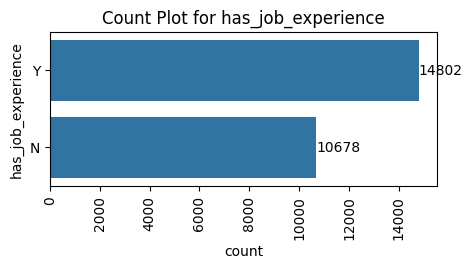

In [22]:
plot_feature(visa_data, 'has_job_experience')

-> requires_job_training

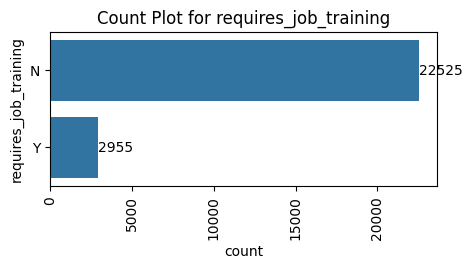

In [23]:
plot_feature(visa_data, 'requires_job_training')

-> no_of_employees

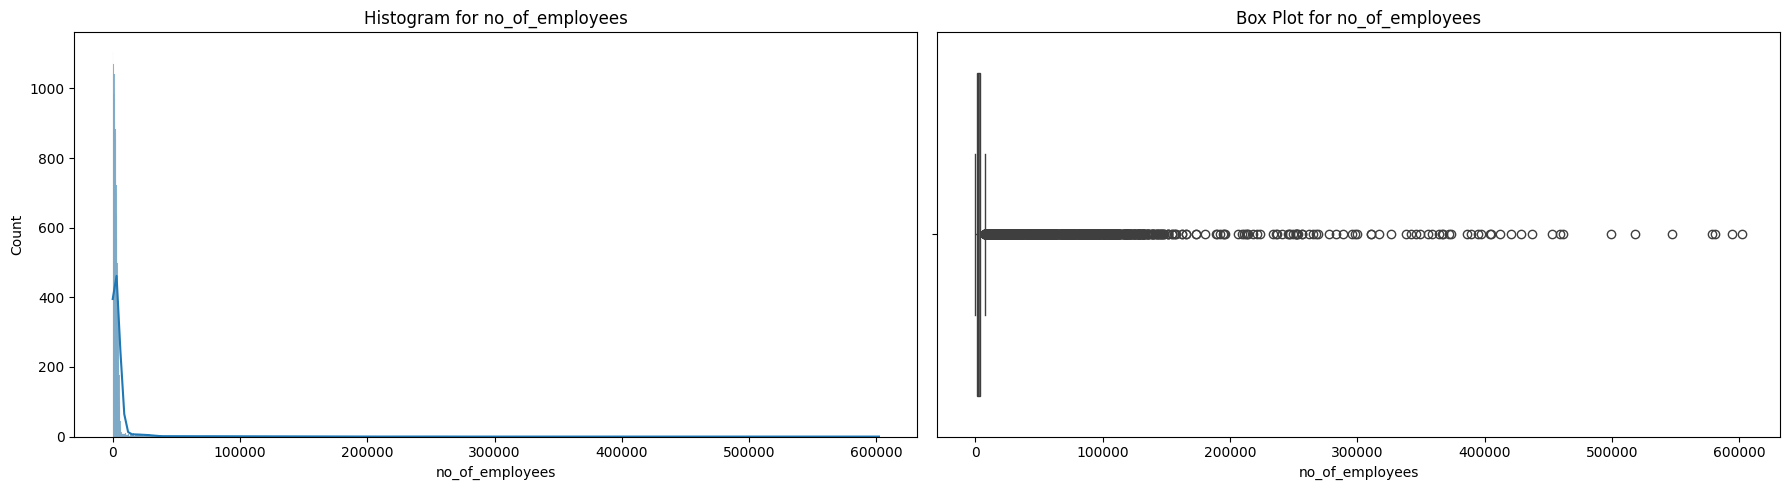

In [24]:
plot_feature(visa_data, 'no_of_employees')

-> yr_of_estab

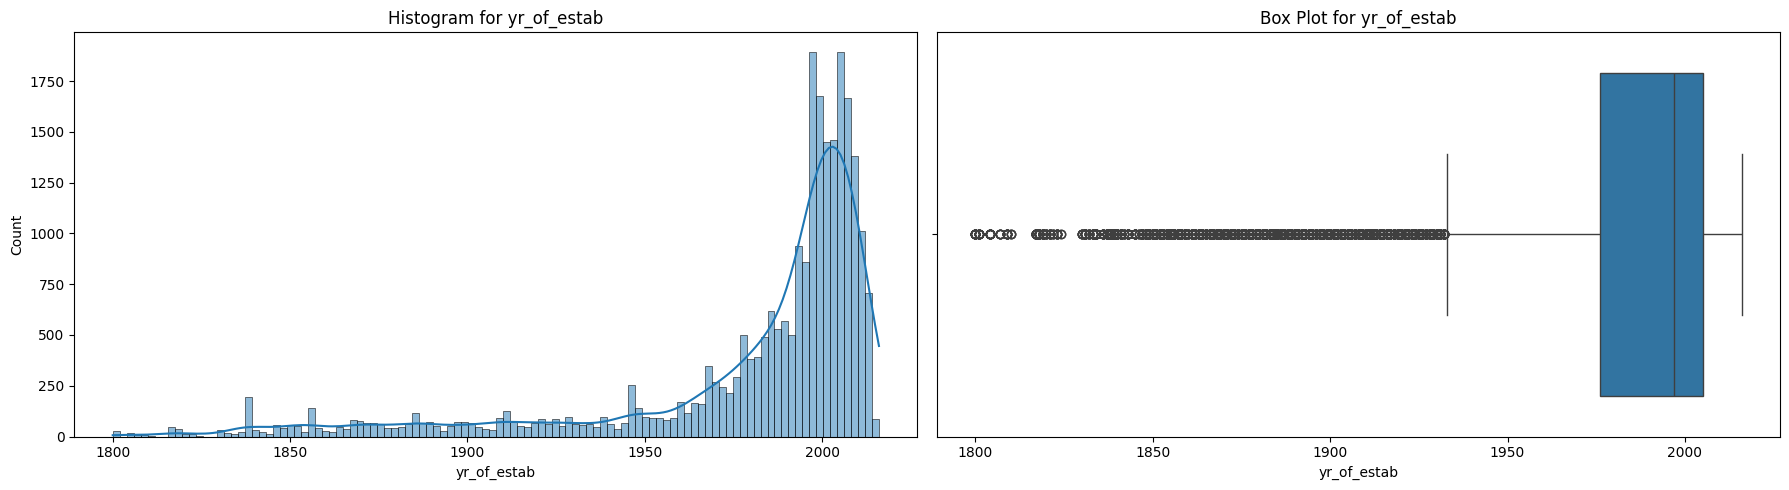

In [25]:
plot_feature(visa_data, 'yr_of_estab')

-> region_of_employment

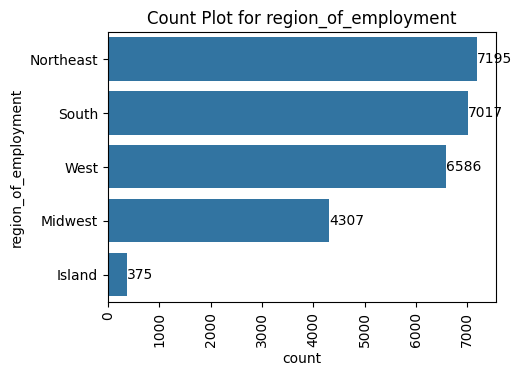

In [26]:
plot_feature(visa_data, 'region_of_employment')

-> prevailing_wage

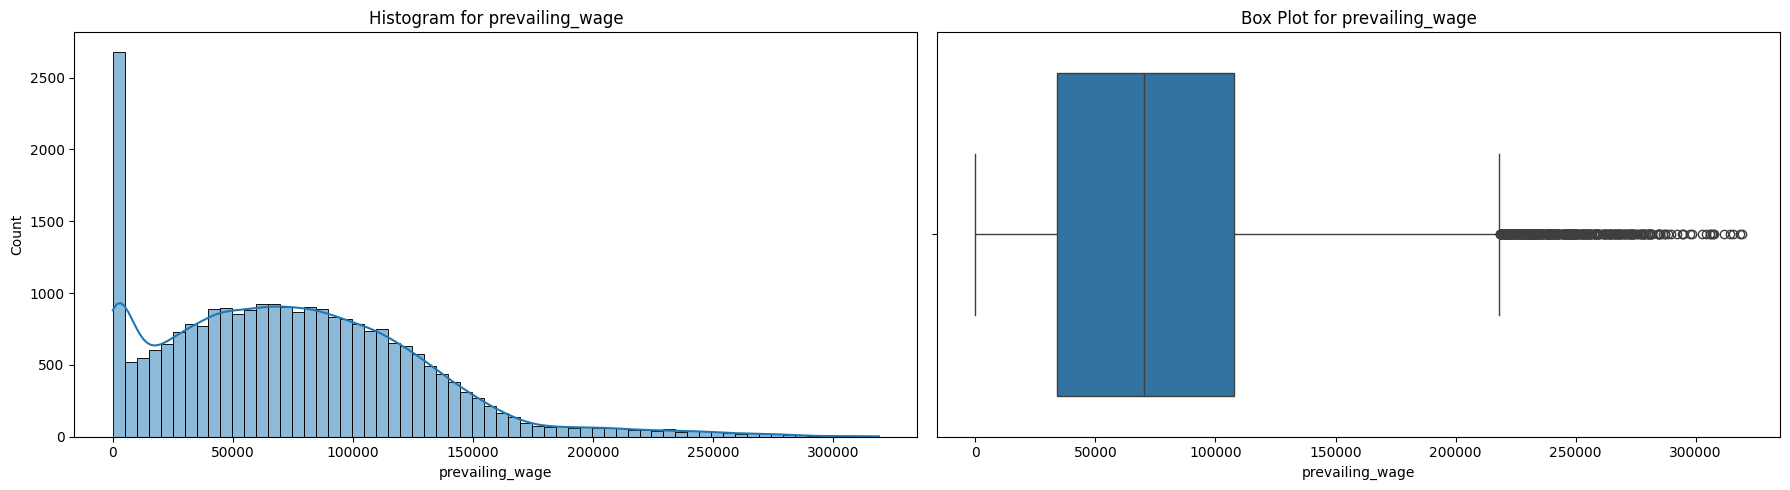

In [27]:
plot_feature(visa_data, 'prevailing_wage')

-> unit_of_wage

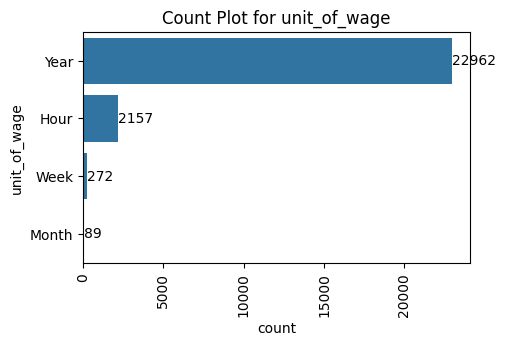

In [28]:
plot_feature(visa_data, 'unit_of_wage')

-> full_time_position

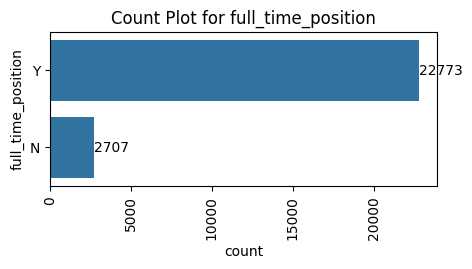

In [29]:
plot_feature(visa_data, 'full_time_position')

-> case_status

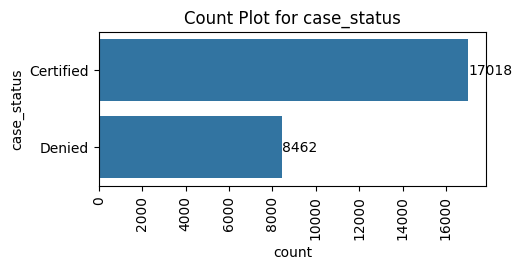

In [30]:
plot_feature(visa_data, 'case_status')

---

### Multivariate Analysis

#### Pairplot of all the numeric features

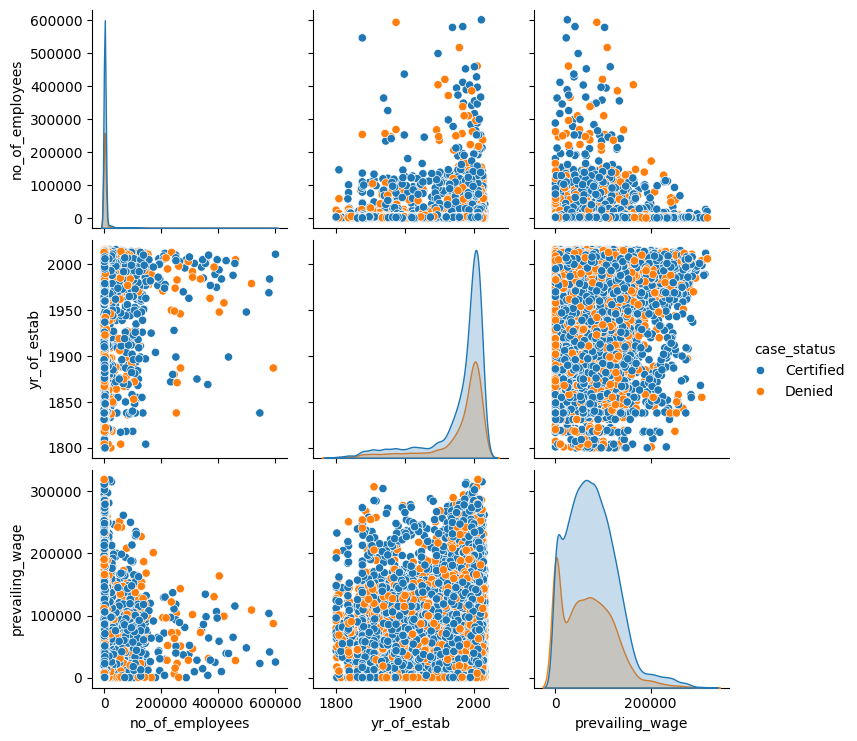

In [31]:
# Plotting a pair plot of the numeric features in the dataset
sns.pairplot(visa_data, hue='case_status')
plt.show()

#### Heatmap to check Correlation between numeric features

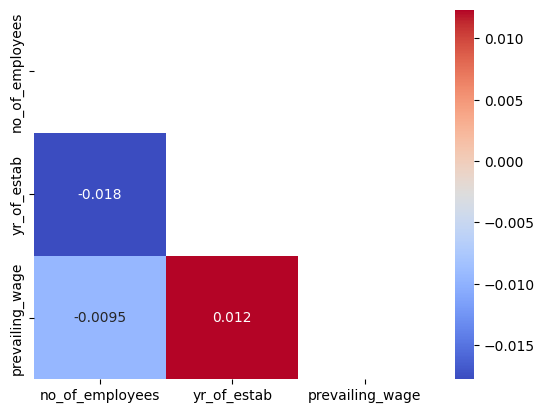

In [32]:
# Creating a correlation matrix of the numeric data in the dataset
corr_mat = visa_data[visa_data.select_dtypes(include=['number']).columns].corr()

# Plotting a heatmap of the numeric features
sns.heatmap(
    corr_mat,
    annot=True,
    cmap='coolwarm',
    mask=np.triu(np.ones_like(corr_mat, dtype=bool))
)

plt.show()

Plotting boxplot of wages against all categorical features

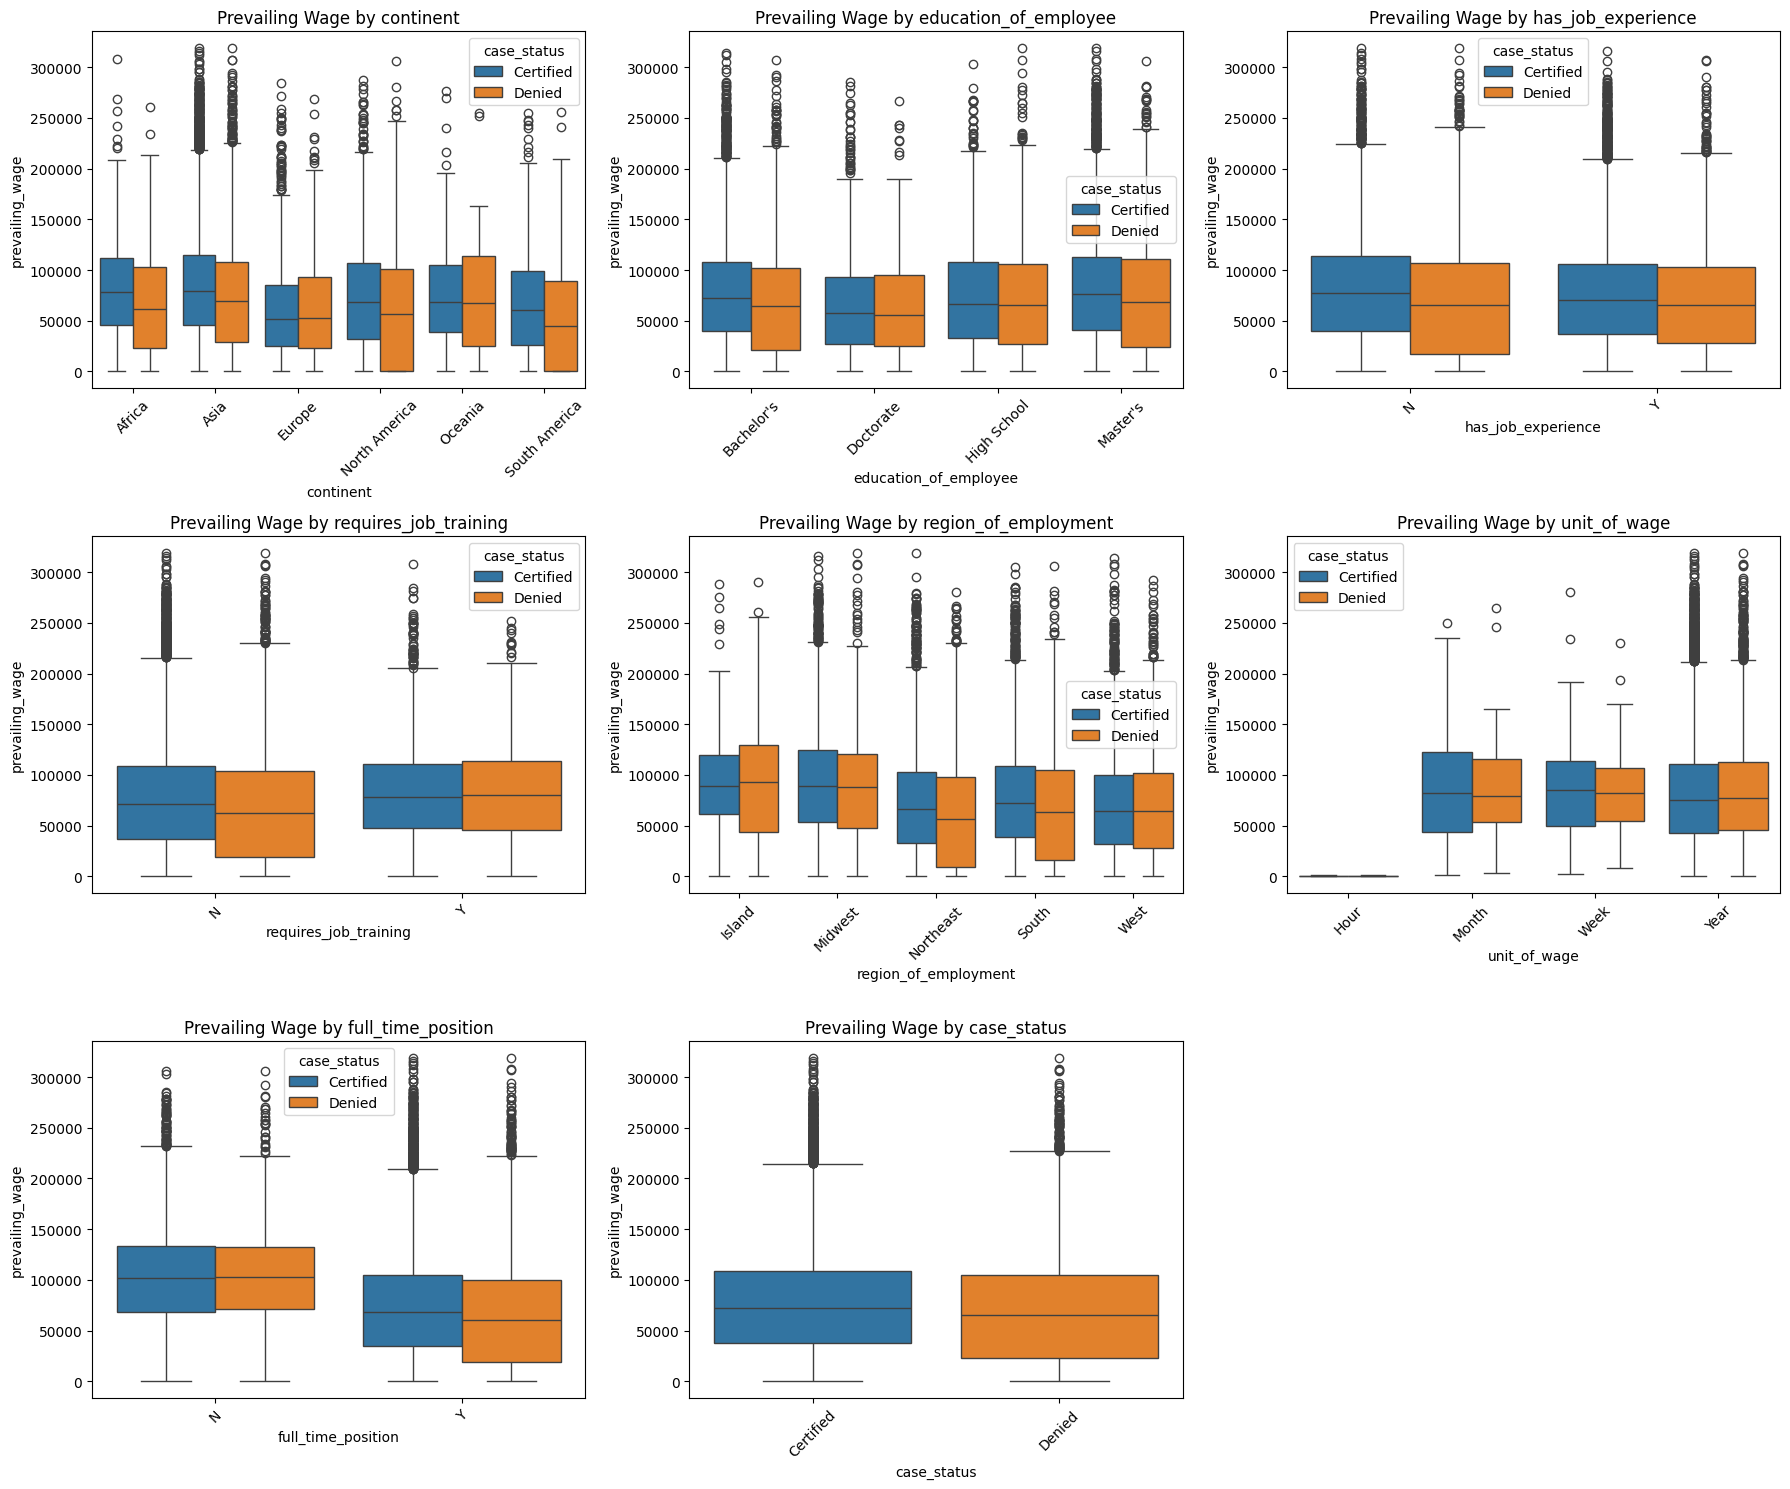

In [33]:
# Creating a list of categorical features
cat_features = [col for col in visa_data.columns if visa_data[col].dtype.name == 'category']
n_features = len(cat_features)

# Defining grid size
n_cols = 3
n_rows = math.ceil(len(cat_features) / n_cols)

# Creating subplots with 3 columns
fig, axes = plt.subplots(math.ceil(len(cat_features) / 3), 3, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

# Looping through to plot all category features
for idx, feature in enumerate(cat_features):
    sns.boxplot(
        data=visa_data,
        x=feature,
        y='prevailing_wage',
        hue='case_status',
        ax=axes[idx]
    )
    axes[idx].set_title(f'Prevailing Wage by {feature}')
    axes[idx].tick_params(axis='x', rotation=45)

# Hiding any empty subplots
for i in range(len(cat_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Plotting Company Size vs Education vs Certification Rate

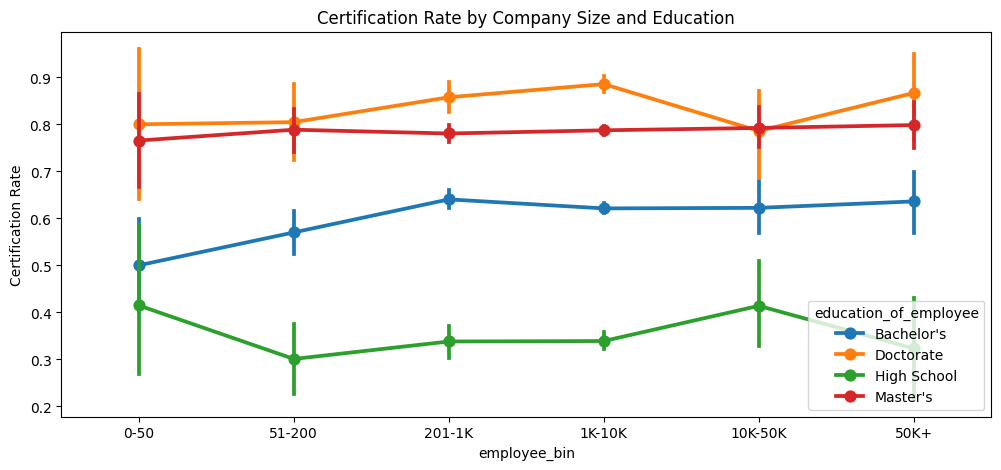

In [34]:
# Creating binned categories for company size based on the number of employees
visa_data['employee_bin'] = pd.cut(
    visa_data['no_of_employees'],
    bins=[0, 50, 200, 1000, 10000, 50000, np.inf],
    labels=['0-50', '51-200', '201-1K', '1K-10K', '10K-50K', '50K+']
)

# Plotting a point plot to show visa certification rates by company size and education level
plt.figure(figsize=(12, 5))
sns.pointplot(
    data=visa_data,
    x='employee_bin',
    y=(visa_data['case_status'] == 'Certified').astype(int),
    hue='education_of_employee'
)

# Adding plot title and labels
plt.title('Certification Rate by Company Size and Education')
plt.ylabel('Certification Rate')
plt.show()

Plotting a heatmap of job experience and required training with the respective average certification rate

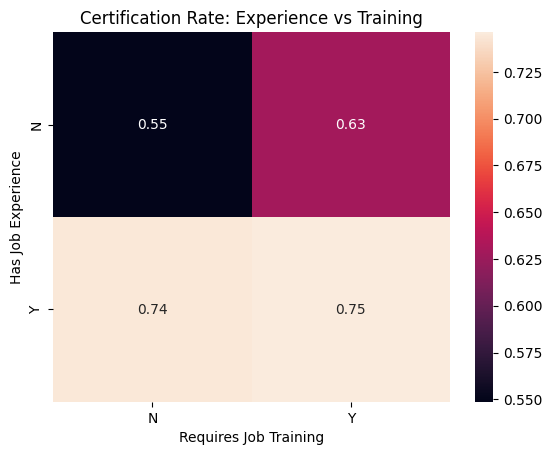

In [35]:
# Creating a heatmap of job experience and job training
exp_train_ct = pd.crosstab(
    index=visa_data['has_job_experience'],
    columns=visa_data['requires_job_training'],
    values=(visa_data['case_status'] == 'Certified').astype(int),
    aggfunc='mean'
)

# Plotting a heatmap to visualize certification rates based on experience and
# training
sns.heatmap(
    exp_train_ct,
    annot=True,
    fmt=".2f"
)

# Adding plot title and axis labels
plt.title('Certification Rate: Experience vs Training')
plt.xlabel('Requires Job Training')
plt.ylabel('Has Job Experience')
plt.show()

Plotting Stacked Barcharts for all Categorical Features against Case Status

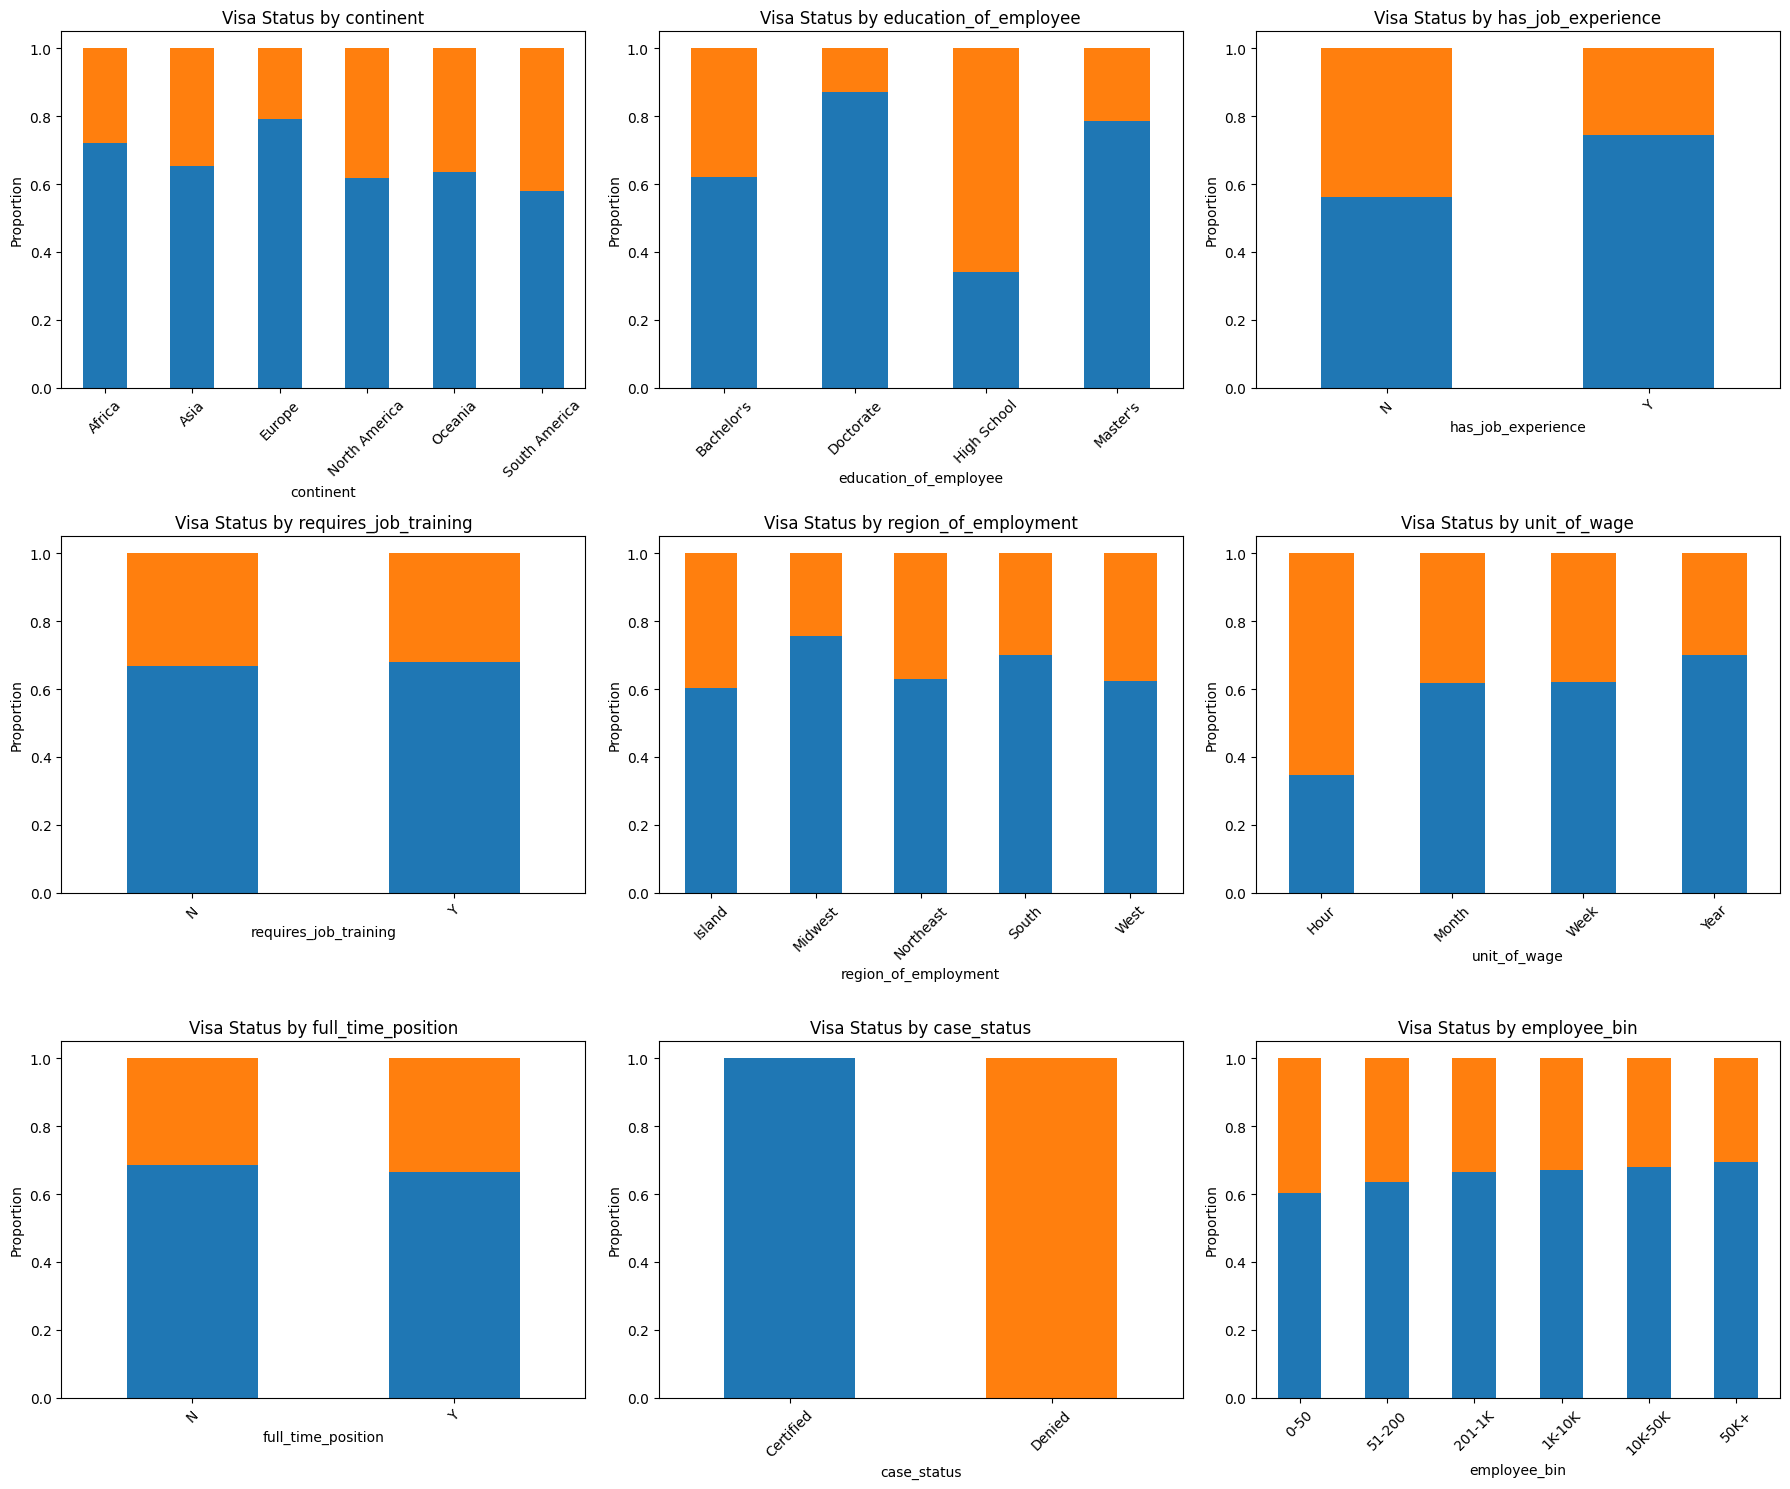

In [36]:
# Creating a list of categorical features
cat_features = [col for col in visa_data.columns if visa_data[col].dtype.name == 'category']
n_features = len(cat_features)

# Defining grid size
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Creating subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through each categorical feature
for idx, feature in enumerate(cat_features):

    # Creating normalized crosstab (proportion of Certified/Denied)
    ctab = pd.crosstab(
        visa_data[feature],
        visa_data['case_status'],
        normalize='index'
    )

    # Plot directly into the subplot using its axis
    ctab.plot(
        kind='bar',
        stacked=True,
        ax=axes[idx],
        legend=False  # Hide legend for clarity
    )

    # Add titles and formatting
    axes[idx].set_title(f'Visa Status by {feature}')
    axes[idx].set_ylabel('Proportion')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove extra axes (if any)
for i in range(len(cat_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

Inferences:
*   Certified applications consistently show higher prevailing wages across all categories. A higher wages increase the likelihood of visa certification
*   Doctorate and Master’s degree holders have the highest certification rates
*   Visa certification rate increases with company size
*   Applicants with job experience and training have the highest certification rates
*   Full-time roles have significantly higher certification rates than part-time roles
*   Hourly wage roles have the lowest certification rates
*   West and Northeast regions show slightly higher certification proportions
*   no_of_employees, prevailing_wage, and yr_of_estab have very low correlation with each other

---

# **Data Pre-processing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Checking for Outliers again

<Figure size 1500x1200 with 0 Axes>

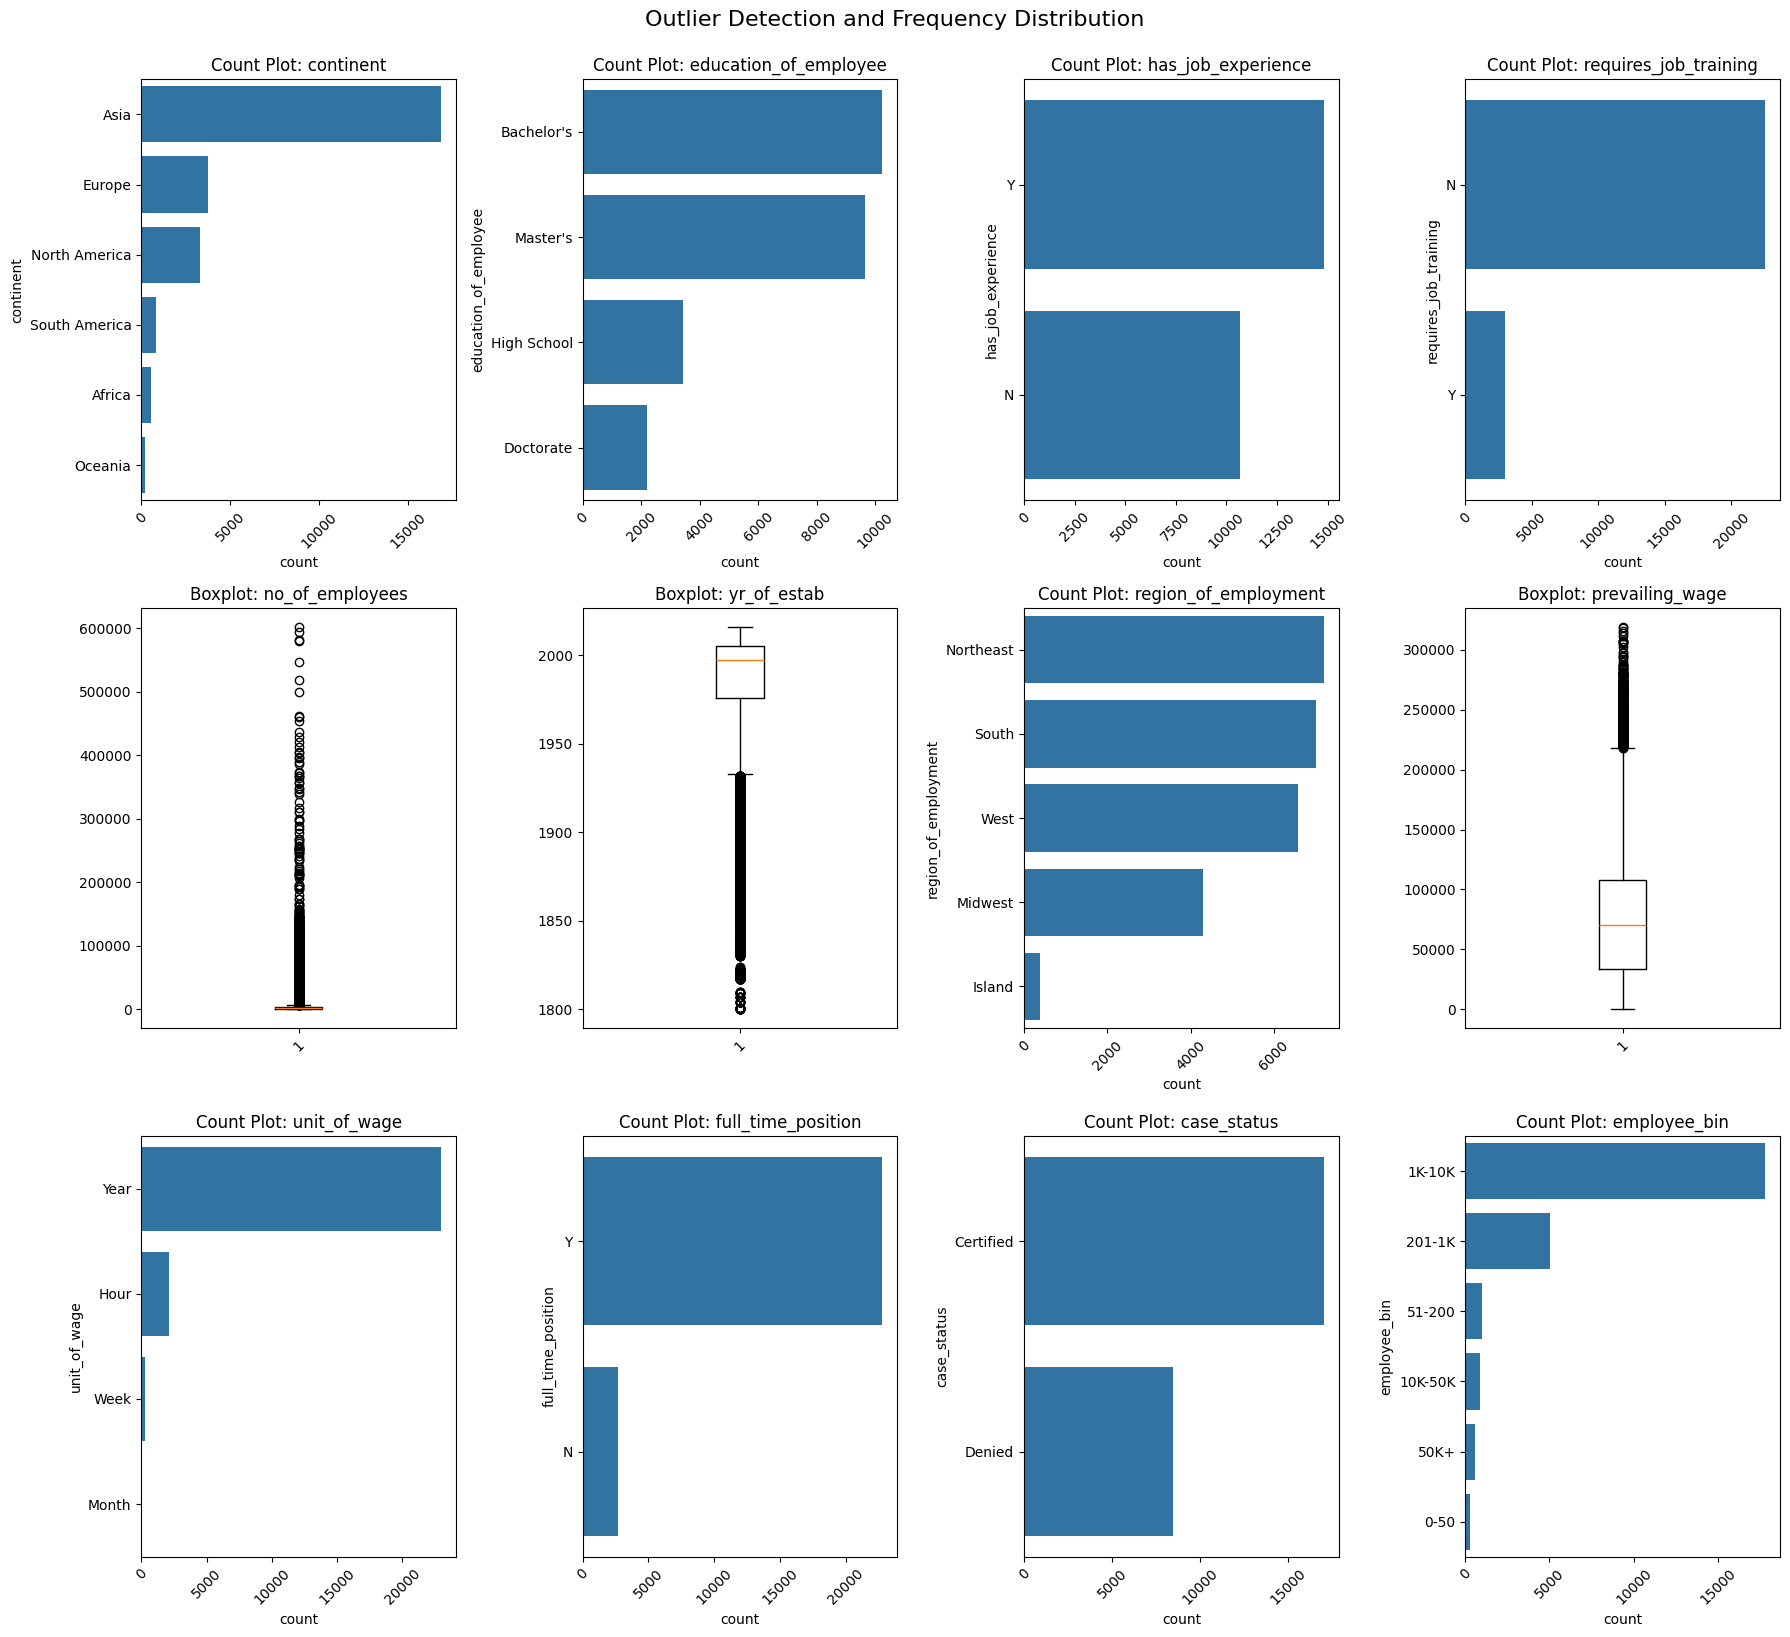

In [37]:
# Outlier detection using boxplot and countplot
plt.figure(figsize=(15, 12))

# Counting the number of features
features = visa_data.columns.tolist()

# Adjusting the grid size based on your number of features and creating figure
# and axes
fig, axes = plt.subplots(int(np.ceil(len(features) / 4)), 4, figsize=(18, 16))
axes = axes.flatten()  # Flatten in case of multi-dimensional array

for i, feature in enumerate(features):
    ax = axes[i]

    if visa_data[feature].dtypes == 'category':
        sns.countplot(
            y=feature,
            data=visa_data,
            order=visa_data[feature].value_counts().index,
            ax=ax
        )

        ax.set_title(f'Count Plot: {feature}')
    else:
        ax.boxplot(visa_data[feature].dropna(), whis=1.5)
        ax.set_title(f'Boxplot: {feature}')

    ax.tick_params(axis='x', rotation=45)

# Hiding any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Outlier Detection and Frequency Distribution", fontsize=16, y=1.02)
plt.show()

All numeric features have outliers

#### Checking for nulls and missing values

In [38]:
# CHecking for null values
visa_data.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


In [39]:
# Checking for missing values
visa_data.isna().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


In [40]:
# Checking for duplicates
visa_data.duplicated().sum()

np.int64(0)

#### Preparing data for modeling

In [41]:
# Converting Certified as 0 and Denied as 1
visa_data['case_status'] = visa_data['case_status'].map({'Denied': 0, 'Certified': 1}).astype(float)

# replacing whitespace with _
visa_data.columns = visa_data.columns.str.replace(' ', '_')

# Converting the yr_of_estab to company age, 2016 being application year
visa_data['company_age'] = 2016 - visa_data['yr_of_estab']
visa_data.drop(columns=['yr_of_estab'], inplace=True)

# Dropping rows with NaN from the dataset
non_nan_train_id = visa_data.notna()
visa_data = visa_data[non_nan_train_id]

# Splitting the data into features and target
X = visa_data.drop('case_status', axis=1)
y = visa_data['case_status']

# One-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True, dtype=float)

# Splitting initial temp-test split (80% temp, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting further temp into train-validation (80/20 of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

Result Train-Validation-Test split (64%, 16%, 20%)

---

# **Model Building**

Functions for Performance Check

In [42]:
# Defining function to check model performance by computing accuracy, precision,
# recall and f1 score
def modelPerformanceCheck(model, predictors, target):
    # Predicting
    pred = model.predict(predictors)

    # Computing scores
    accuracy = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1s = f1_score(target, pred)

    # Returning metrics dataframe
    return [accuracy, recall, precision, f1s]

# Defining function to plot confusion matrix
def plotConfusionMatrix(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    # Creating grid for subplots
    fig, axes = plt.subplots(1, 3, figsize=(9, 2))

    # Grouping datasets
    datasets = [
        ("Training", X_train, y_train),
        ("Validation", X_val, y_val),
        ("Testing", X_test, y_test)
    ]

    for ax, (label, X, y) in zip(axes, datasets):
        # Predicting
        y_pred = model.predict(X)

        # Generating Confusion matrix
        cm = confusion_matrix(y, y_pred)

        # Plotting confusion matrix
        sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap='Blues',
            cbar=False,
            ax=ax,
            annot_kws={"size": 10}
        )

        # Adding labels
        ax.set_title(label, fontsize=10)
        ax.set_xlabel("Predicted", fontsize=9)
        ax.set_ylabel("Actual", fontsize=9)
        ax.tick_params(labelsize=8)

    plt.suptitle(f"Confusion Matrices - {model_name}", fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

List of Predictive Models to be used

In [43]:
# Creating a list of models to be used for the Classifications using ensemble
# techniques
classification_models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=1)),
    ('Random Forest', RandomForestClassifier(random_state=1)),
    ('Bagging', BaggingClassifier(random_state=1)),
    ('AdaBoost', AdaBoostClassifier(random_state=1)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=1)),
    ('XGBoost', XGBClassifier(random_state=1)),
    ('LightGBM', LGBMClassifier(random_state=1, verbose=-1)),
    ('Stacking', StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=1)),
            ('gb', GradientBoostingClassifier(random_state=1))
        ],
        final_estimator=MLPClassifier(
            hidden_layer_sizes=(50,),
            max_iter=500, random_state=1
        ),
        cv=5)
    )
]

Model Fitting and F1-Score

In [44]:
# Function to check Training and validation data F1 score
def modelTrainValidationF1Score(model_list, X_train, y_train, X_val, y_val):

    print('\nTraining and Validation Performance:\n')

    # Lists to hold training and validation performance
    f1_train_list = []
    f1_validation_list = []

    # Looping through the models to compute the F1 Scores
    for name, model in model_list:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        f1_train = f1_score(y_train, y_train_pred)
        f1_val = f1_score(y_val, y_val_pred)

        f1_train_list.append((name, f1_train))
        f1_validation_list.append(f1_val)

    # Creating dataframe to hold performance data
    f1_data = pd.DataFrame(f1_train_list, columns = ['Model', 'Training F1 Score'])
    f1_data['Validation F1 Score'] = f1_validation_list

    print(f1_data)

# Calling function to check training and validation F1 Scores - Original data
modelTrainValidationF1Score(classification_models, X_train, y_train, X_val, y_val)


Training and Validation Performance:

               Model  Training F1 Score  Validation F1 Score
0      Decision Tree           1.000000             0.737803
1      Random Forest           0.999954             0.802234
2            Bagging           0.987920             0.776081
3           AdaBoost           0.816704             0.820817
4  Gradient Boosting           0.826578             0.823793
5            XGBoost           0.888675             0.813160
6           LightGBM           0.843533             0.820947
7           Stacking           0.845766             0.825172


Model Performance Interpretation:
*   Decision Tree - Model is overfitting with poor generalization
*   Random Forest - Slightly overfitting but good generalization
*   Bagging - Slightly better regularized tree ensemble
*   AdaBoost - Good generalization and effectively balances bias and variance with moderate complexity
*   Gradient Boosting - Balanced and well performing
*   XGBoost - Strong performance that needs tuning
*   LightGBM - Efficient and robust with a good candidate
*   Stacking - Best generalization  with good bias-variance tradeoff


Oversampling Data

In [45]:
# Original data denial rate
y_train.value_counts(normalize=True)

,proportion
case_status,
1.0,0.666462
0.0,0.333538


{'Denied': 0, 'Certified': 1}

In [46]:
# Oversampling minority class using Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)

# Checking new denial rate
y_train_os.value_counts(normalize=True)

,proportion
case_status,
0.0,0.5
1.0,0.5


In [47]:
# Calling function to check training and validation F1 Scores - Oversampled
# data
modelTrainValidationF1Score(classification_models, X_train_os, y_train_os, X_val, y_val)


Training and Validation Performance:

               Model  Training F1 Score  Validation F1 Score
0      Decision Tree           1.000000             0.732552
1      Random Forest           1.000000             0.800707
2            Bagging           0.986561             0.764608
3           AdaBoost           0.806681             0.816157
4  Gradient Boosting           0.819138             0.821879
5            XGBoost           0.876567             0.806210
6           LightGBM           0.838544             0.822813
7           Stacking           0.854125             0.822645


With oversampling, the performance of all models slightly decreased except LightGBM, which shows a slight increase in performance. Gradient Boosting, LightGBM and Stacking are still top performers.

Undersampling data

In [48]:
# Undersampling data using RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1, random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Checking new denial rate
y_train_un.value_counts(normalize=True)

,proportion
case_status,
0.0,0.5
1.0,0.5


In [49]:
# Calling function to check training and validation F1 Scores - undersampled
# data
modelTrainValidationF1Score(classification_models, X_train_un, y_train_un, X_val, y_val)


Training and Validation Performance:

               Model  Training F1 Score  Validation F1 Score
0      Decision Tree           1.000000             0.684296
1      Random Forest           1.000000             0.725466
2            Bagging           0.977442             0.680382
3           AdaBoost           0.694790             0.753970
4  Gradient Boosting           0.720306             0.763943
5            XGBoost           0.867569             0.741242
6           LightGBM           0.778492             0.766829
7           Stacking           0.798533             0.762149


Undersampling Inference:
*   Large Drop - Decision Tree, Random Forest, Bagging
*   Morderate Drop - AdaBoost, Gradient Boosting, XGBoost
*   Slight Drop - LightGBM, Stacking

Looking at the undersampling and oversampling sets, oversampling might be of some value but undersampling is surely not the way to go.

---

# **Model Performance Improvement**

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```


### Tuning on imbalanced data

#### Decision Tree - Hyperparameter Tuning

In [50]:
# Choosing the type of classifier
dt_tuned = DecisionTreeClassifier(random_state=1)

# Grid search parameters
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Defining the type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the grid search
grid_obj = GridSearchCV(dt_tuned, param_grid, scoring=acc_scorer, cv=5, n_jobs=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the clf to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(4), max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

#### Random Forest - Hyperparameter Tuning

In [51]:
# Choosing the type of classifier
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

# Grid search parameters
param_grid = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Defining the type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the grid search
grid_obj = GridSearchCV(rf_tuned, param_grid, scoring=acc_scorer, cv=5, n_jobs=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(10), max_features='log2',
                       min_samples_split=7, n_estimators=np.int64(30),
                       oob_score=True, random_state=1)

#### Bagging - Hyperparameter Tuning

In [52]:
# Choosing the type of classifier
bagging_tuned = BaggingClassifier(random_state=1)

# Grid search parameters
param_grid = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70],
}

# Defining the type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the grid search
grid_obj = GridSearchCV(bagging_tuned, param_grid, scoring=acc_scorer, cv=5, n_jobs=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

#### Ada Boost - Hyperparameter Tuning

In [53]:
# Choosing the type of classifier
ada_tuned = AdaBoostClassifier(random_state=1)

# Grid search parameters
param_dist = {
    "n_estimators": np.arange(50, 150, 10),
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
        DecisionTreeClassifier(max_depth=4, random_state=1),
        DecisionTreeClassifier(max_depth=5, random_state=1)
    ]
}

# Defining the type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the randomized search
rnd_search_obj = RandomizedSearchCV(
    ada_tuned,
    param_dist,
    scoring=acc_scorer,
    cv=5,
    n_jobs=1,
    n_iter=20
)

# Fitting on training data
random_search = rnd_search_obj.fit(X_train, y_train)

# Setting the clf to the best combination of parameters
ada_tuned = random_search.best_estimator_

# Fitting the best algorithm to the data
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=np.int64(80),
                   random_state=1)

#### Gradient Boosting - Hyperparameter Tuning

In [54]:
# Choosing the type of classifier
gb_tuned = GradientBoostingClassifier(random_state=1)

# Randomized search parameter distribution
param_dist = {
    "init": [
        AdaBoostClassifier(random_state=1),
        DecisionTreeClassifier(random_state=1)
    ],
    "n_estimators": np.arange(50, 110, 10),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "max_features": [0.5, 0.7, 0.9, 1.0],
}

# Defining F1 scorer
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_tuned,
    param_distributions=param_dist,
    scoring=acc_scorer,
    cv=5,
    n_iter=20,
    n_jobs=1,
    random_state=1
)

# Fitting on training data
random_search.fit(X_train, y_train)

# Setting gb_tuned to the best estimator found
gb_tuned = random_search.best_estimator_

# Fitting the final model
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1.0, n_estimators=np.int64(100),
                           random_state=1, subsample=0.8)

#### XGBoost - Hyperparameter Tuning

In [55]:
# Choosing the type of classifier
xgb_tuned = XGBClassifier(
    random_state=1,
    use_label_encoder=False,  # suppress warning
    eval_metric='logloss'     # required for latest XGBoost
)

# Randomized search parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 110, 10),
    'scale_pos_weight': [1, 2, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [0, 1, 2, 3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
}

# Defining F1 scorer
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Running RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist,
    scoring=f1_scorer,
    cv=5,
    n_iter=20,
    n_jobs=1,
    random_state=1
)

# Fitting the search object to training data
random_search.fit(X_train, y_train)

# Setting the classifier to the best estimator found
xgb_tuned = random_search.best_estimator_

# Fitting the best model to the training data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(50), n_jobs=None,
              num_parallel_tree=None, ...)

#### LightGBM - Hyperparameter Tuning

In [56]:
# Choosing the type of classifier
lgbm_tuned = LGBMClassifier(random_state=1, verbose=-1)

# Parameter distributions for randomized search
param_dist = {
    'n_estimators': [50, 75, 100, 125, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [-1, 5, 10, 15],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Scorer using F1 score
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Running RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm_tuned,
    param_distributions=param_dist,
    scoring=f1_scorer,
    cv=5,
    n_iter=20,
    n_jobs=1,
    random_state=1
)

# Fitting randomized search on training data
random_search.fit(X_train, y_train)

# Setting the best model
lgbm_tuned = random_search.best_estimator_

# Fitting the final model
lgbm_tuned.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, max_depth=15,
               n_estimators=50, num_leaves=15, random_state=1, subsample=0.9,
               verbose=-1)

#### Stacking - Hyperparameter Tuning

In [57]:
# Choosing the type of stacking classifier
stacking_tuned = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=1)),
        ('gb', GradientBoostingClassifier(random_state=1))
    ],
    final_estimator=MLPClassifier(max_iter=300, random_state=1),
    cv=3,
    n_jobs=1
)

# Suggested param grid for tuning final estimator (MLP)
param_dist = {
    'final_estimator__hidden_layer_sizes': [(25,), (50,), (100,), (50, 25)],
    'final_estimator__alpha': [0.0001, 0.001, 0.01, 0.1],
    'final_estimator__learning_rate_init': [0.001, 0.01, 0.05]
}

# Defining the scoring
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=stacking_tuned,
    param_distributions=param_dist,
    scoring=f1_scorer,
    cv=5,
    n_iter=10,
    n_jobs=1,
    random_state=1
)

# Fitting the search on training data
random_search.fit(X_train, y_train)

# Setting the best estimator
stacking_tuned = random_search.best_estimator_

# Fitting the final model
stacking_tuned.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('rf', RandomForestClassifier(random_state=1)),
                               ('gb',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(25,),
                                                 learning_rate_init=0.05,
                                                 max_iter=300, random_state=1),
                   n_jobs=1)

---

### Tuning on Oversampled Data

Decision Tree - Hyperparameter Tuning - Oversampled

In [58]:
# Choosing the type of classifier
dt_tuned_os = DecisionTreeClassifier(random_state=1)

# Grid search parameters
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Defining the type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the grid search
grid_obj = GridSearchCV(dt_tuned, param_grid, scoring=acc_scorer, cv=5, n_jobs=1)
grid_obj = grid_obj.fit(X_train_os, y_train_os)

# Setting the clf to the best combination of parameters
dt_tuned_os = grid_obj.best_estimator_

# Fitting the best algorithm to the data
dt_tuned_os.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(5), max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

Random Forest - Hyperparameter Tuning - Oversampled

In [59]:
# Choosing the type of classifier
rf_tuned_os = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

# Grid search parameters
param_grid = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Defining the type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the grid search
grid_obj = GridSearchCV(rf_tuned, param_grid, scoring=acc_scorer, cv=5, n_jobs=1)
grid_obj = grid_obj.fit(X_train_os, y_train_os)

# Setting the clf to the best combination of parameters
rf_tuned_os = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
rf_tuned_os.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(10), max_features='log2',
                       min_samples_split=7, n_estimators=np.int64(30),
                       oob_score=True, random_state=1)

Bagging - Hyperparameter Tuning - Oversampled

In [60]:
# Choosing the type of classifier
bagging_tuned_os = BaggingClassifier(random_state=1)

# Grid search parameters
param_grid = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70],
}

# Defining the type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the grid search
grid_obj = GridSearchCV(bagging_tuned, param_grid, scoring=acc_scorer, cv=5, n_jobs=1)
grid_obj = grid_obj.fit(X_train_os, y_train_os)

# Setting the clf to the best combination of parameters
bagging_tuned_os = grid_obj.best_estimator_

# Fitting the best algorithm to the data
bagging_tuned_os.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=70,
                  random_state=1)

Ada Boost - Hyperparameter Tuning - Oversampled

In [62]:
# Choosing the type of classifier
ada_tuned_os = AdaBoostClassifier(random_state=1)

# Grid search parameters
param_dist = {
    "n_estimators": np.arange(50, 150, 10),
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
        DecisionTreeClassifier(max_depth=4, random_state=1),
        DecisionTreeClassifier(max_depth=5, random_state=1)
    ]
}

# Defining the type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running the randomized search
rnd_search_obj = RandomizedSearchCV(
    ada_tuned,
    param_dist,
    scoring=acc_scorer,
    cv=5,
    n_jobs=1,
    n_iter=20
)

# Fitting on training data
random_search = rnd_search_obj.fit(X_train_os, y_train_os)

# Setting the clf to the best combination of parameters
ada_tuned_os = random_search.best_estimator_

# Fitting the best algorithm to the data
ada_tuned_os.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=1),
                   learning_rate=0.3, n_estimators=np.int64(110),
                   random_state=1)

Gradient Boosting - Hyperparameter Tuning - Oversampled

In [63]:
# Choosing the type of classifier
gb_tuned_os = GradientBoostingClassifier(random_state=1)

# Randomized search parameter distribution
param_dist = {
    "init": [
        AdaBoostClassifier(random_state=1),
        DecisionTreeClassifier(random_state=1)
    ],
    "n_estimators": np.arange(50, 110, 10),
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "max_features": [0.5, 0.7, 0.9, 1.0],
}

# Defining F1 scorer
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Running RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_tuned,
    param_distributions=param_dist,
    scoring=acc_scorer,
    cv=5,
    n_iter=20,
    n_jobs=1,
    random_state=1
)

# Fitting on training data
random_search.fit(X_train_os, y_train_os)

# Setting gb_tuned to the best estimator found
gb_tuned_os = random_search.best_estimator_

# Fitting the final model
gb_tuned_os.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=1.0,
                           n_estimators=np.int64(70), random_state=1)

XGBoost - Hyperparameter Tuning - Oversampled

In [64]:
# Choosing the type of classifier
xgb_tuned_os = XGBClassifier(
    random_state=1,
    use_label_encoder=False,  # suppress warning
    eval_metric='logloss'     # required for latest XGBoost
)

# Randomized search parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 110, 10),
    'scale_pos_weight': [1, 2, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [0, 1, 2, 3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
}

# Defining F1 scorer
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Running RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist,
    scoring=f1_scorer,
    cv=5,
    n_iter=20,
    n_jobs=1,
    random_state=1
)

# Fitting the search object to training data
random_search.fit(X_train_os, y_train_os)

# Setting the classifier to the best estimator found
xgb_tuned_os = random_search.best_estimator_

# Fitting the best model to the training data
xgb_tuned_os.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(70), n_jobs=None,
              num_parallel_tree=None, ...)

LightGBM - Hyperparameter Tuning - Oversampled

In [65]:
# Choosing the type of classifier
lgbm_tuned_os = LGBMClassifier(random_state=1, verbose=-1)

# Parameter distributions for randomized search
param_dist = {
    'n_estimators': [50, 75, 100, 125, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [-1, 5, 10, 15],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Scorer using F1 score
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Running RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm_tuned,
    param_distributions=param_dist,
    scoring=f1_scorer,
    cv=5,
    n_iter=20,
    n_jobs=1,
    random_state=1
)

# Fitting randomized search on training data
random_search.fit(X_train_os, y_train_os)

# Setting the best model
lgbm_tuned_os = random_search.best_estimator_

# Fitting the final model
lgbm_tuned_os.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
               n_estimators=150, num_leaves=63, random_state=1, verbose=-1)

Stacking - Hyperparameter Tuning - Oversampled

In [66]:
# Choosing the type of stacking classifier
stacking_tuned_os = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=1)),
        ('gb', GradientBoostingClassifier(random_state=1))
    ],
    final_estimator=MLPClassifier(max_iter=300, random_state=1),
    cv=3,
    n_jobs=1
)

# Suggested param grid for tuning final estimator (MLP)
param_dist = {
    'final_estimator__hidden_layer_sizes': [(25,), (50,), (100,), (50, 25)],
    'final_estimator__alpha': [0.0001, 0.001, 0.01, 0.1],
    'final_estimator__learning_rate_init': [0.001, 0.01, 0.05]
}

# Defining the scoring
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=stacking_tuned,
    param_distributions=param_dist,
    scoring=f1_scorer,
    cv=5,
    n_iter=10,
    n_jobs=1,
    random_state=1
)

# Fitting the search on training data
random_search.fit(X_train_os, y_train_os)

# Setting the best estimator
stacking_tuned_os = random_search.best_estimator_

# Fitting the final model
stacking_tuned_os.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('rf', RandomForestClassifier(random_state=1)),
                               ('gb',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(25,),
                                                 learning_rate_init=0.05,
                                                 max_iter=300, random_state=1),
                   n_jobs=1)

---

### Model Performance Check

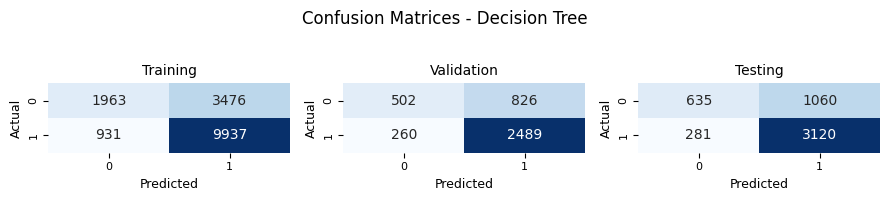

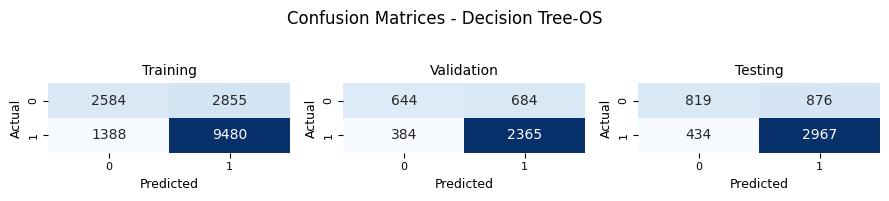

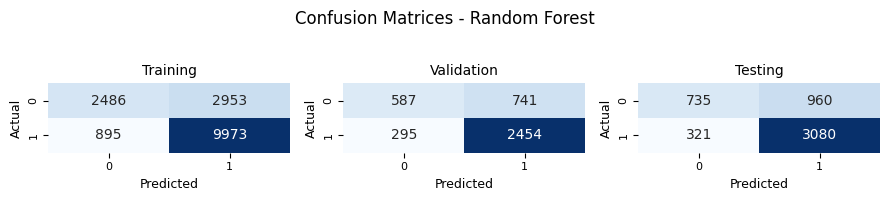

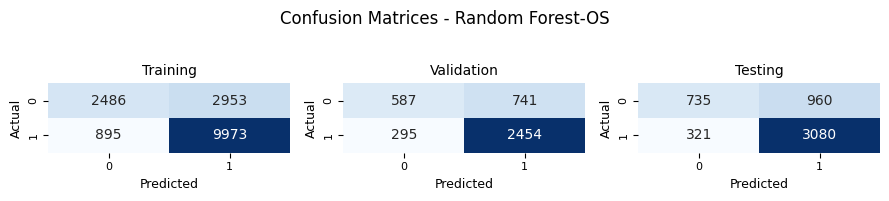

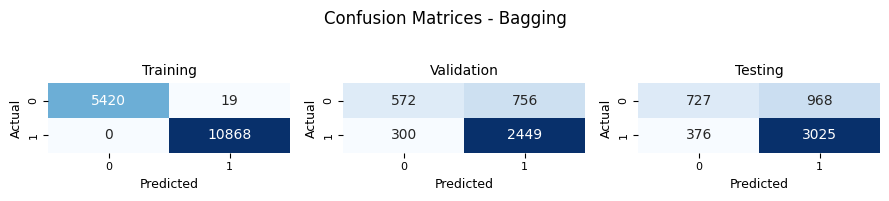

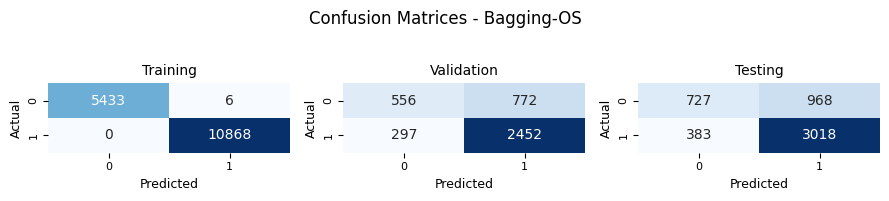

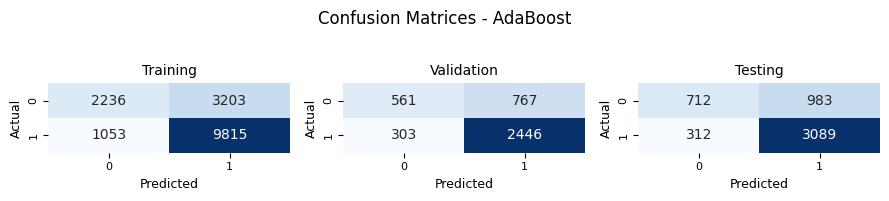

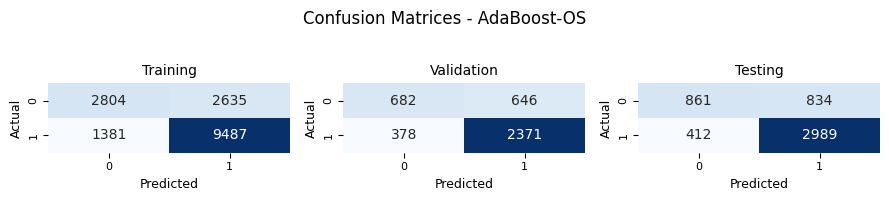

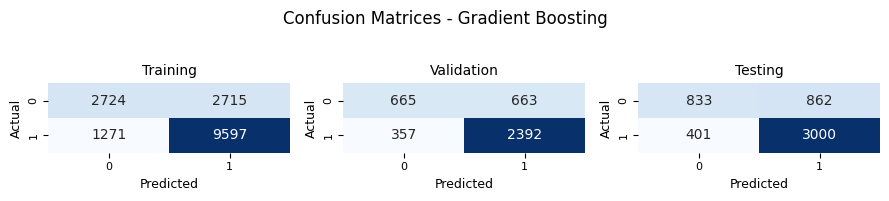

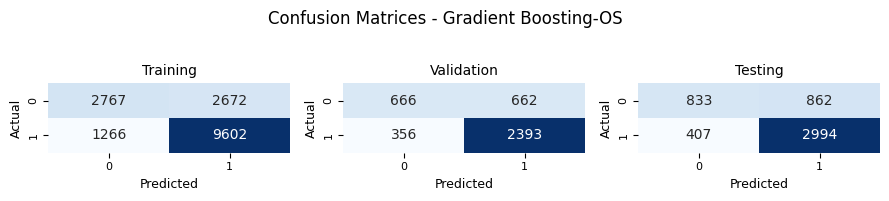

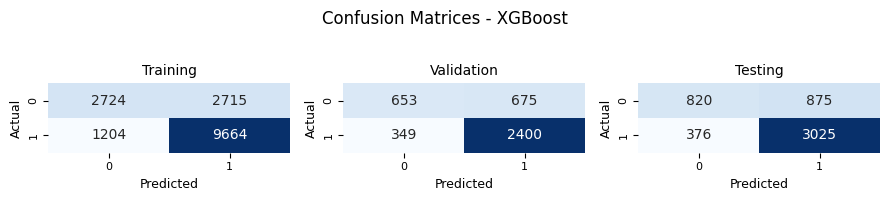

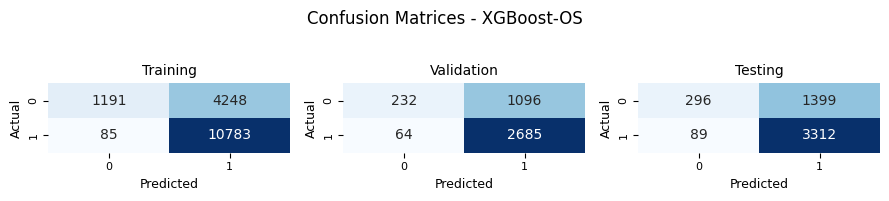

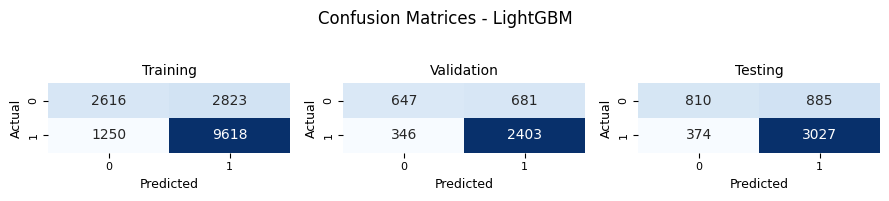

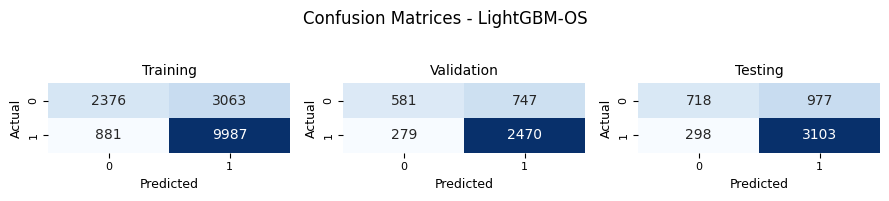

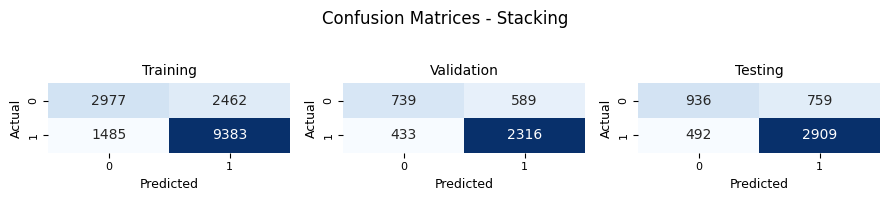

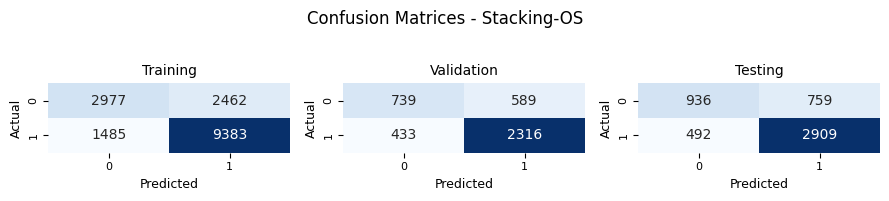

In [67]:
# Updating model list with the tuned models
classification_models = [
    ('Decision Tree', dt_tuned),
    ('Decision Tree-OS', dt_tuned_os),
    ('Random Forest', rf_tuned),
    ('Random Forest-OS', rf_tuned_os),
    ('Bagging', bagging_tuned),
    ('Bagging-OS', bagging_tuned_os),
    ('AdaBoost', ada_tuned),
    ('AdaBoost-OS', ada_tuned_os),
    ('Gradient Boosting', gb_tuned),
    ('Gradient Boosting-OS', gb_tuned_os),
    ('XGBoost', xgb_tuned),
    ('XGBoost-OS', xgb_tuned_os),
    ('LightGBM', lgbm_tuned),
    ('LightGBM-OS', lgbm_tuned_os),
    ('Stacking', stacking_tuned),
    ('Stacking-OS', stacking_tuned_os)
]

# Looping through all models to plot the confusion metrics for each model on the Training, Validation and Testing data
for name, model in classification_models:
    plotConfusionMatrix(model, X_train, y_train, X_val, y_val, X_test, y_test, name)

In [68]:
# Checking the performance of the models
# Defining metric names
metric_names = ["Accuracy", "Recall", "Precision", "F1 Score"]

# Initializing list to collect all model results
rows = []

# Looping through models and collect scores
for name, model in classification_models:
    train_scores = modelPerformanceCheck(model, X_train, y_train)
    val_scores = modelPerformanceCheck(model, X_val, y_val)
    test_scores = modelPerformanceCheck(model, X_test, y_test)

    row = [name] + train_scores + val_scores + test_scores
    rows.append(row)

# Create the DataFrame
columns = ["Model"] + \
          [f"Train {m}" for m in metric_names] + \
          [f"Validation {m}" for m in metric_names] + \
          [f"Test {m}" for m in metric_names]

modelPerformanceData = pd.DataFrame(rows, columns=columns)

# Displaying the result
modelPerformanceData

,Model,Train Accuracy,Train Recall,Train Precision,Train F1 Score,Validation Accuracy,Validation Recall,Validation Precision,Validation F1 Score,Test Accuracy,Test Recall,Test Precision,Test F1 Score
0,Decision Tree,0.729748,0.914336,0.740848,0.818500,0.733628,0.905420,0.750830,0.820910,0.736852,0.917377,0.746411,0.823110
1,Decision Tree-OS,0.739805,0.872286,0.768545,0.817136,0.738043,0.860313,0.775664,0.815799,0.742936,0.872390,0.772053,0.819161
2,Random Forest,0.764028,0.917648,0.771546,0.838279,0.745892,0.892688,0.768075,0.825707,0.748626,0.905616,0.762376,0.827846
3,Random Forest-OS,0.764028,0.917648,0.771546,0.838279,0.745892,0.892688,0.768075,0.825707,0.748626,0.905616,0.762376,0.827846
4,Bagging,0.998835,1.000000,0.998255,0.999127,0.740986,0.890869,0.764119,0.822640,0.736264,0.889444,0.757576,0.818231
5,Bagging-OS,0.999632,1.000000,0.999448,0.999724,0.737797,0.891961,0.760546,0.821028,0.734890,0.887386,0.757150,0.817111
6,AdaBoost,0.739008,0.903110,0.753956,0.821820,0.737552,0.889778,0.761282,0.820530,0.745879,0.908262,0.758595,0.826709
7,AdaBoost-OS,0.753725,0.872930,0.782627,0.825315,0.748835,0.862495,0.785880,0.822407,0.755495,0.878859,0.781847,0.827519
8,Gradient Boosting,0.755565,0.883051,0.779483,0.828041,0.749816,0.870135,0.782979,0.824259,0.752159,0.882094,0.776800,0.826105
9,Gradient Boosting-OS,0.758509,0.883511,0.782304,0.829833,0.750307,0.870498,0.783306,0.824604,0.750981,0.880329,0.776452,0.825134


Comments on Tuned Model Performances:

The following models stand out for their strong generalization, minimal overfitting, and balanced precision and recall, making them well-suited for reliable visa approval prediction. Top 5 models are here:

| **Model**         | **Validation F1** | **Test F1** | **Test Precision** | **Test Recall** |
| ----------------- | ----------------- | ----------- | ------------------ | --------------- |
| **XGBoost**       | 0.8242            | **0.8287**  | 0.7756             | 0.8894          |
| LightGBM-OS       | 0.8280            | 0.8296      | 0.7605             | **0.9124**      |
| LightGBM          | 0.8239            | 0.8278      | 0.7738             | 0.8900          |
| AdaBoost-OS       | 0.8224            | 0.8275      | **0.7818**         | 0.8789          |
| Gradient Boosting | 0.8243            | 0.8261      | 0.7768             | 0.8821          |


*   XGBoost continues to be the top performer with the highest F1 score on the test set 0.8287
*   LightGBM and Random Forest also achieve consistently high performance across all sets
*   AdaBoost and Gradient Boosting show strong balance and remain competitive, with minimal drop-off between validation and test scores
*   Oversampling had mixed impact, slightly improving recall in some models (like LightGBM-OS) but slightly decreasing precision

---

# **Model Comparison and Final Model Selection**

XGBoost trained on impalanced original data stands out when checked on test data and so it makes sense to select XGBoost as the final model.

Plotting ROC and AUC Curves

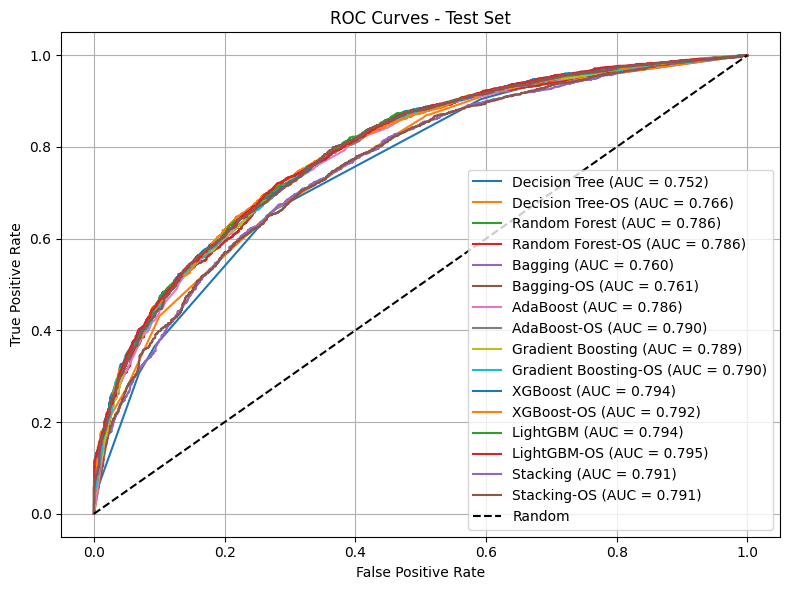

In [69]:
# Function to plot ROC and AUC Curves
def plot_roc_curves(models, X_val, y_val):
    plt.figure(figsize=(8, 6))

    for name, model in models:
        # Getting predicted probabilities
        if hasattr(model, "predict_proba"):
            y_probs = model.predict_proba(X_test)[:, 1]
        else:
            # Defining fallback for models that don't have predict_proba
            y_probs = model.decision_function(X_test)

        # Computing ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc = roc_auc_score(y_test, y_probs)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

    # Plotting random chance line
    plt.plot([0, 1], [0, 1], 'k--', label="Random")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves - Test Set")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calling function to generate the plots
plot_roc_curves(classification_models, X_test, y_test)

Inference on ROC-AUC:
*   LightGBM-OS is the best overall model combining the highest F1 Score and top AUC (0.795), ideal when both precision and recall are important
*   XGBoost is nearly tied and may be preferred if a slight edge in precision is desired
*   Gradient Boosting-OS and AdaBoost-OS are strong and consistent backups

Precision - Recall Curve

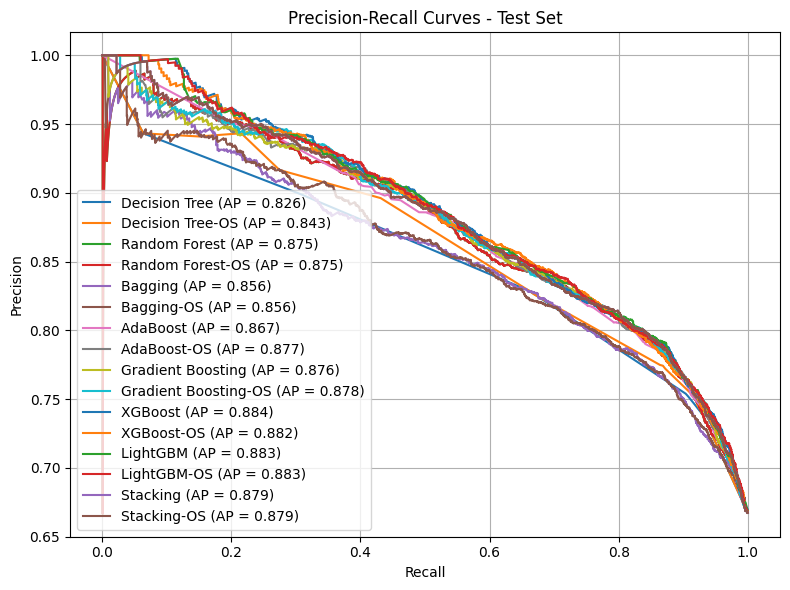

In [70]:
# Function to plot Precision-Recall Curves
def plot_precision_recall_curves(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for name, model in models:
        # Getting predicted probabilities or decision function
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_scores = model.decision_function(X_test)

        # Calculating Precision-Recall values
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        ap_score = average_precision_score(y_test, y_scores)

        # Plotting curve
        plt.plot(recall, precision, label=f"{name} (AP = {ap_score:.3f})")

    # Adding labels
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curves - Test Set")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calling function to plot the Precision-Recall curves
plot_precision_recall_curves(classification_models, X_test, y_test)

After comparing all the models using different scores, the tuned XGBoost model stands out as the best model. Following are the details:
*   Model - XGBoost - Tuned using Hyperparameter Tuning using RandomizedSearchCV
*   F1 Score - 0.8287
*   AUC - 0.794
*   Precision-Recall - 0.884
*   Stable classification through Train, Validation and Test. No sign of overfitting or underfitting. Best model overall

Second best model is LightGBM-OS: Slightly better F1 but marginally behind XGBoost on AP.

Feature Importance

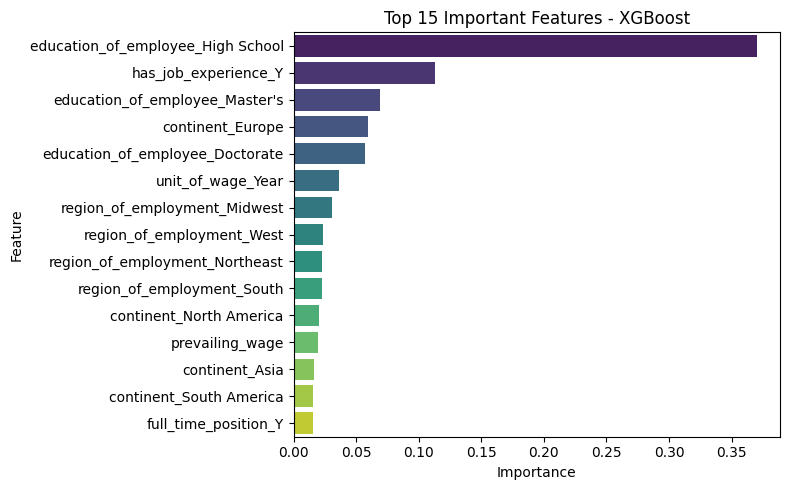

In [71]:
# Defining function to plot feature importance
def plot_feature_importance(model, feature_names, model_name, top_n=15):
    # Getting feature importances
    importances = model.feature_importances_

    # Creating dataframe
    feat_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plotting top N features
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=feat_df.head(top_n), palette='viridis')
    plt.title(f'Top {top_n} Important Features - {model_name}')
    plt.tight_layout()
    plt.show()

# Calling function to plot feature importance for the best model XGBoost
plot_feature_importance(xgb_tuned, X_train.columns, "XGBoost")

SHAP values for interpretability

 97%|=================== | 4962/5096 [00:20<00:00]       

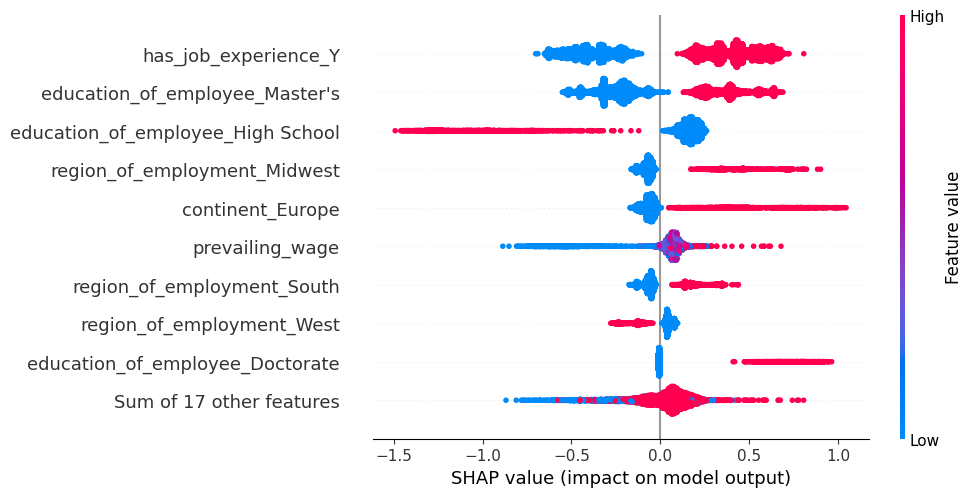

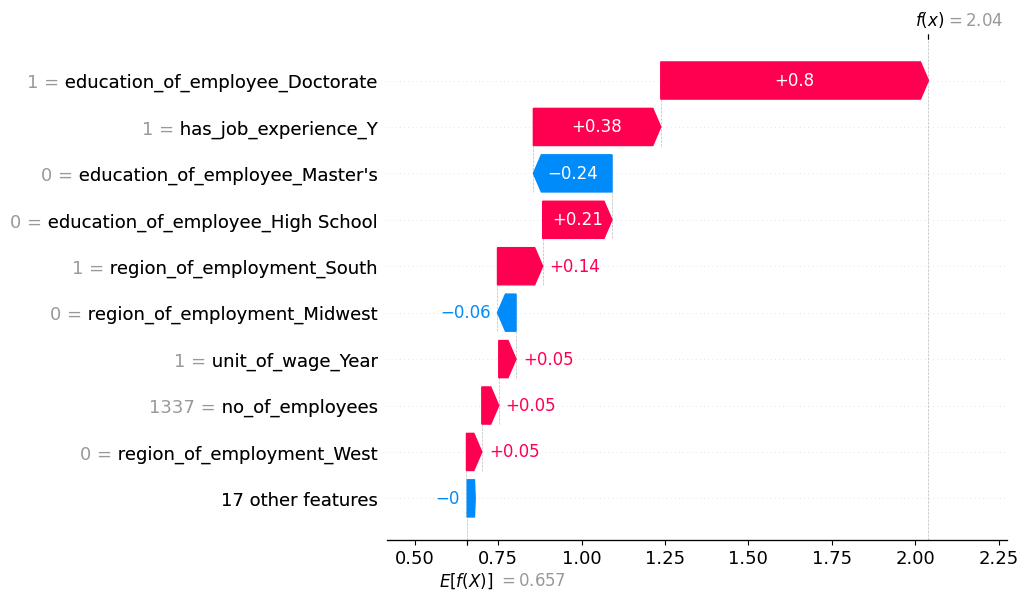

In [72]:
explainer = shap.Explainer(xgb_tuned, X_train)
shap_values = explainer(X_test)

# Summary plot (global)
shap.plots.beeswarm(shap_values)

# For a single prediction
shap.plots.waterfall(shap_values[0])

Interpretation:
*   education_of_employee_Doctorate contributes +0.8, strongly increasing approval likelihood
*   has_job_experience_Y adds +0.38, reinforcing the positive decision
*   education_of_employee_Master's = 0 (i.e., not having a Master’s degree) reduces the score by -0.24
*   education_of_employee_High School = 0 increases the prediction by +0.21 — possibly implying this candidate had higher education
*   region_of_employment_South and unit_of_wage_Year provide slight positive contributions.

Calibration Curve

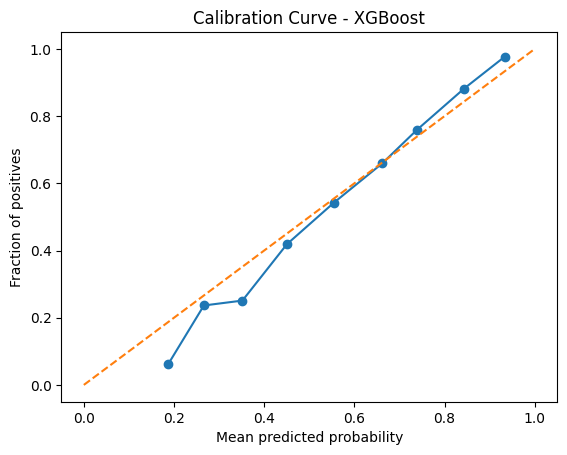

In [73]:
# Getting predicted probabilities for the positive class from the tuned XGBoost model
y_prob = xgb_tuned.predict_proba(X_test)[:, 1]

# Computing the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

# Plotting the calibration curve
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')

# Adding axis labels and plot title
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve - XGBoost")
plt.show()

The model’s predicted probabilities are well-calibrated.
Final comment: XGBoost trained on original imbalanced data stands out as the best model which has the best score and balance between precision and recall.

---

# **Actionable Insights and Recommendations**

Insights:
*   Top Predictors of Visa Approval - has_job_experience, education_of_employee and region_of_employment significantly impact approval.
*   High Predictive Performance - Precision, recall, F1, and AUC-ROC scores across models show robust discrimination between certified and denied cases implying strong potential to automate and streamline the visa approval screening process.
*   Well-Calibrated Model - Calibration curve shows that predicted probabilities align well with actual approval outcomes which means that we can trust the probability output to assess risk and make threshold-based decisions.

Recommendations:
*   Build a pre-assessment tool using the tuned XGBoost model that provides Approval probability, Risk factors and Suggested profile improvements.
*   Share insights with employers on how to identify high approval likelihood profiles based on advanced degrees, prior experience, region-wise success rates to inform hiring location strategies.
*   Use feature importance and SHAP insights to recommend education milestones, gaining local job experience or certifications and offer personalized improvement paths to boost visa chances.

---

In [74]:
# Converting ipynb to html for submission
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Project_Full_Code_Notebook_EasyVisa_Sayan.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Project_Full_Code_Notebook_EasyVisa_Sayan.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 43 image(s).
[NbConvertApp] Writing 3654969 bytes to /content/drive/MyDrive/Colab Notebooks/Project_Full_Code_Notebook_EasyVisa_Sayan.html
